In [46]:
#author:fkw
#utf-8
#creat time:2021/11/28
#SVM
#dataset=iris
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
#load the dataset
iris = datasets.load_iris()
# 特征值
diris = iris.data
# 标签
tiris = iris.target
labels = ['setosa', 'versicolor', 'virginica']

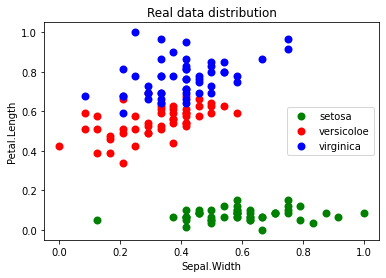

In [47]:
#数据可视化
# 数组归一化 x=(x-min)/(max-min)
for i in range(4):
    diris[:, i] = (diris[:, i]-np.min(diris[:, i]))/(np.max(diris[:, i])-np.min(diris[:, i]))
#绘制dataset散点图,选取2,3列作为Xlable,ylabel
x_axis=diris[:,1]
y_axis=diris[:,2]
plt.scatter(x_axis[tiris==0],y_axis[tiris==0],c='green',marker='.',linewidths=5)
plt.scatter(x_axis[tiris==1],y_axis[tiris==1],c='red',marker='.',linewidths=5)
plt.scatter(x_axis[tiris==2],y_axis[tiris==2],c='blue',marker='.',linewidths=5)
plt.legend(["setosa","versicoloe","virginica"])
plt.title("Real data distribution")
plt.xlabel('Sepal.Width')
plt.ylabel('Petal.Length')
plt.show()

In [48]:
# 划分训练集和测试集
# 样本总数
num = diris.shape[0]
# 划分数据集 train/test=7:3 
ratio = 7/3 
# 测试集样本数目
num_test = int(num/(1+ratio))
# 训练集样本数目 
num_train = num-num_test 
# 产生样本标号并打乱
index = np.arange(num)
np.random.shuffle(index) 
#前30%做测试集
diris_test = diris[index[:num_test],:]
tiris_test = tiris[index[:num_test]]
#剩余的做训练集
diris_train = diris[index[:num_test],:]
tiris_train = tiris[index[:num_test]]

In [49]:
#构建分类器
#kernel是不同的方法
svm_linear = SVC(C=1, kernel='linear')
svm_rbf= SVC(C=1, kernel='rbf')
svm_poly= SVC(C=1, kernel='poly')
svm_sigmoid= SVC(C=1, kernel='sigmoid')
#分类器的训练时间
t0=time.time()
svm_linear.fit(diris_train,tiris_train)
t1=time.time()
svm_rbf.fit(diris_train,tiris_train)
t2=time.time()
svm_poly.fit(diris_train,tiris_train)
t3=time.time()
svm_sigmoid.fit(diris_train,tiris_train)
t4=time.time()
#正确率
acc_linear_train=accuracy_score(tiris_train,svm_linear.predict(diris_train))
acc_linear_test=accuracy_score(tiris_test,svm_linear.predict(diris_test))
acc_linear_train=accuracy_score(tiris_train,svm_rbf.predict(diris_train))
acc_rbf_test=accuracy_score(tiris_test,svm_rbf.predict(diris_test))
acc_poly_train=accuracy_score(tiris_train,svm_poly.predict(diris_train))
acc_poly_test=accuracy_score(tiris_test,svm_poly.predict(diris_test))
acc_sigmoid_train=accuracy_score(tiris_train,svm_sigmoid.predict(diris_train))
acc_sigmoid_test=accuracy_score(tiris_test,svm_sigmoid.predict(diris_test))

train_acc: [1.0, 1.0, 1.0, 0.4444444444444444]
test_acc: [1.0, 1.0, 1.0, 0.4444444444444444]


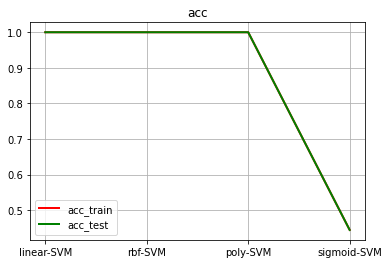

In [50]:
#画图_不同svm的acc
x=[0,1,2,3]
y_train=[acc_linear_train,acc_linear_train,acc_poly_train,acc_sigmoid_train]
y_test=[acc_linear_test,acc_rbf_test,acc_poly_test,acc_sigmoid_test]
plt.plot(x,y_train,'r-',lw=2,label=u'acc_train')
plt.plot(x,y_test,'g-',lw=2,label=u'acc_test')
plt.xticks(x, [u'linear-SVM', u'rbf-SVM', u'poly-SVM', u'sigmoid-SVM'], rotation=0)
plt.legend(loc='lower left')
plt.title('acc')
plt.grid()
print('train_acc:',y_train)
print('test_acc:',y_test)

Model training time (s): [0.038706064224243164, 0.0, 0.004415750503540039, 0.0039103031158447266]


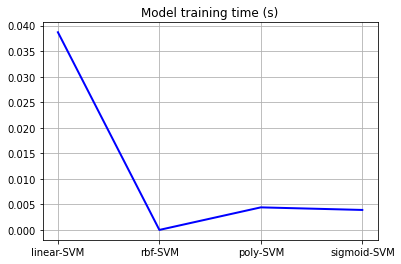

In [51]:
#画图_不同svm的train_time
y_time=[t1-t0,t2-t1,t3-t2,t4-t3]
plt.plot(x,y_time,'b-',lw=2,label=u'acc_test')
plt.xticks(x, [u'linear-SVM', u'rbf-SVM', u'poly-SVM', u'sigmoid-SVM'], rotation=0)
plt.title('Model training time (s)')
plt.grid()
print('Model training time (s):',y_time)

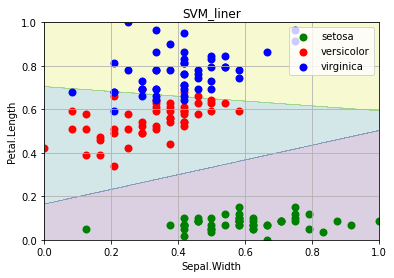

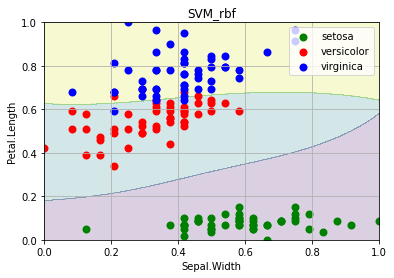

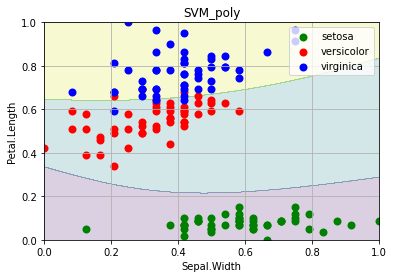

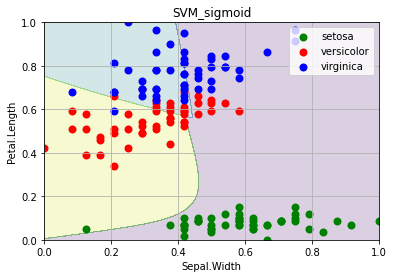

In [52]:
#绘制等高图
#data
diris = iris.data
# 标签
tiris = iris.target
diris=np.dstack((diris[:,1],diris[:,2]))[0]
#print(diris)
#grid_show.shape
svm_linear.fit(diris,tiris)
svm_rbf.fit(diris,tiris)
svm_poly.fit(diris,tiris)
svm_sigmoid.fit(diris,tiris)
#步长0.01
step=0.001
x=np.arange(0,1+step,step)
y=np.arange(0,1+step,step)
#生成网路采样点
X,Y= np.meshgrid(x,y)
#测试点
grid_show = np.dstack((X.flat, Y.flat))[0]
#grid_show.shape
svm_linear_grid = svm_linear.predict(grid_show)
svm_rbf_grid = svm_rbf.predict(grid_show)
svm_poly_grid = svm_poly.predict(grid_show)
svm_sigmoid_grid = svm_sigmoid.predict(grid_show)

svm_linear_grid=np.mat(svm_linear_grid).reshape((len(x),len(y)))
svm_rbf_grid=np.mat(svm_rbf_grid).reshape((len(x),len(y)))
svm_poly_grid=np.mat(svm_poly_grid).reshape((len(x),len(y)))
svm_sigmoid_grid=np.mat(svm_sigmoid_grid).reshape((len(x),len(y)))


#颜色填充
plt.figure()
plt.contourf(X,Y,svm_linear_grid,alpha=0.2)
#画等高线
#plt.contour(X,Y,svm_linear_grid)
plt.scatter(x_axis[tiris==0],y_axis[tiris==0],c='green',marker='.',linewidths=5,label='setosa')
plt.scatter(x_axis[tiris==1],y_axis[tiris==1],c='red',marker='.',linewidths=5,label='versicolor')
plt.scatter(x_axis[tiris==2],y_axis[tiris==2],c='blue',marker='.',linewidths=5,label='virginica') 
plt.title("SVM_liner")
plt.xlabel('Sepal.Width')
plt.ylabel('Petal.Length')
plt.legend(loc='upper right')
plt.grid()
plt.show()

plt.figure()
plt.contourf(X,Y,svm_rbf_grid,alpha=0.2)
#画等高线
#plt.contour(X,Y,svm_rbf_grid)
plt.scatter(x_axis[tiris==0],y_axis[tiris==0],c='green',marker='.',linewidths=5,label='setosa')
plt.scatter(x_axis[tiris==1],y_axis[tiris==1],c='red',marker='.',linewidths=5,label='versicolor')
plt.scatter(x_axis[tiris==2],y_axis[tiris==2],c='blue',marker='.',linewidths=5,label='virginica') 
plt.title("SVM_rbf")
plt.xlabel('Sepal.Width')
plt.ylabel('Petal.Length')
plt.grid()
plt.legend(loc='upper right')
plt.show()

plt.figure()
plt.contourf(X,Y,svm_poly_grid,alpha=0.2)
#画等高线
#plt.contour(X,Y,svm_poly_grid)
plt.scatter(x_axis[tiris==0],y_axis[tiris==0],c='green',marker='.',linewidths=5,label='setosa')
plt.scatter(x_axis[tiris==1],y_axis[tiris==1],c='red',marker='.',linewidths=5,label='versicolor')
plt.scatter(x_axis[tiris==2],y_axis[tiris==2],c='blue',marker='.',linewidths=5,label='virginica') 
plt.title("SVM_poly")
plt.xlabel('Sepal.Width')
plt.ylabel('Petal.Length')
plt.grid()
plt.legend(loc='upper right')
plt.show()

plt.figure()
plt.contourf(X,Y,svm_sigmoid_grid,alpha=0.2)
#画等高线
#plt.contour(X,Y,svm_sigmoid_grid)
plt.scatter(x_axis[tiris==0],y_axis[tiris==0],c='green',marker='.',linewidths=5,label='setosa')
plt.scatter(x_axis[tiris==1],y_axis[tiris==1],c='red',marker='.',linewidths=5,label='versicolor')
plt.scatter(x_axis[tiris==2],y_axis[tiris==2],c='blue',marker='.',linewidths=5,label='virginica') 
plt.title("SVM_sigmoid")
plt.xlabel('Sepal.Width')
plt.grid()
plt.ylabel('Petal.Length')
plt.legend(loc='upper right')
plt.show()


